In [1]:
from OSMPythonTools.api import Api
api = Api()

In [2]:
# Initialize lists for basic data including names, attractions, websites, and addresses
names = []
attractions = []
websites = []
addresses = []

In [3]:
# Query for indianapolis motor speedway
motorSpeedway = api.query('way/589668075')
# Finding the name and appending it to the names list
names.append(motorSpeedway.tag('name'))
# Finding the attraction type and appending it to the attractions list
attractions.append(motorSpeedway.tag('highway'))
# Finding the website if it exists and appending it to the websites list
websites.append(motorSpeedway.tag('website'))
# Finding the address and appending it to the addresses list
motorSpeedwayTicket = api.query('way/388929550')
addresses.append(motorSpeedwayTicket.tag('addr:housenumber') + " " +  motorSpeedwayTicket.tag('addr:street') + ", " + motorSpeedwayTicket.tag('addr:city') + " ," + motorSpeedwayTicket.tag('addr:state'))

In [4]:
# Query for indianapolis state museum
stateMuseum = api.query('relation/6268982')
# Finding the name and appending it to the names list
names.append(stateMuseum.tag('name'))
# Finding the attraction type and appending it to the attractions list
attractions.append(stateMuseum.tag('tourism'))
# Finding the website if it exists and appending it to the websites list
websites.append(stateMuseum.tag('website'))
# Finding the address and appending it to the addresses list
addresses.append(stateMuseum.tag('addr:housenumber') + " " +  stateMuseum.tag('addr:street') + ", " + stateMuseum.tag('addr:city') + " ," + stateMuseum.tag('addr:state'))

In [5]:
# Query for indianapolis capitol building
capitol = api.query('way/339985770')
# Finding the name and appending it to the names list
names.append(capitol.tag('name'))
# Finding the attraction type and appending it to the attractions list
attractions.append(capitol.tag('addr:township'))
# Finding the website if it exists and appending it to the websites list
websites.append(capitol.tag('website'))
# Finding the address and appending it to the addresses list
addresses.append(capitol.tag('addr:housenumber') + " " +  capitol.tag('addr:street') + ", " + capitol.tag('addr:city') + " ," + capitol.tag('addr:state'))


In [6]:
# Query for white river state park
whiteRiver = api.query('way/113890743')
# Finding the name and appending it to the names list
names.append(whiteRiver.tag('name'))
# Finding the attraction type and appending it to the attractions list
attractions.append(whiteRiver.tag('leisure'))
# Finding the website if it exists and appending it to the websites list
websites.append(whiteRiver.tag('source'))
# Finding the address and appending it to the addresses list
addresses.append(addresses[len(addresses)-1])

In [7]:
# Initializing a dicitonary for different types of attractions
hoursPerAttraction = {'museum' : 3, 'park' : 3, 'zoo' : 5, 'memorial' : 1, 'center' : 1, 'raceway' : 2, 'stadium' : 2}
# Finding the duration for each selected attraction from the attractions list
duration = []
for attraction in attractions:
    if attraction.lower() in hoursPerAttraction:
        duration.append(str(hoursPerAttraction[attraction.lower()]) + " hours") 


In [8]:
# Initializing a list of strings for the schedule as well as the start times and end times for each activity
schedule = []
startTime = [9]
endTime = []
# Suffix for the end time
suffix = " AM"
# Loop to add each event to the schedule
for i in range(len(duration)):
    # End time is the start time added with the first integer in the duration
    endTime.append(startTime[i] + int(duration[i][0]))
    # If the end time is after 12, instead of going to 13, it resets
    if endTime[i] > 12:
        suffix = " PM"
        endTime[i] = endTime[i] % 12
    # Schedule appens the start time followed by a dash to the end time with its respective suffix
    schedule.append(str(startTime[i]) + "-" + str(endTime[i]) + suffix)
    # 1 hour gap between activities
    startTime.append(endTime[i] + 1)

In [9]:
import pandas as pd

# Data frame for each column, output to a .csv file
data = pd.DataFrame({
    'Name of Attraction': names,
    'Attraction Type': attractions,
    'Website' : websites,
    'Address' : addresses,
    'Duration' : duration, 
    'Schedule' : schedule
})
data.to_csv('Indianapolis_Attractions.csv', index=False)

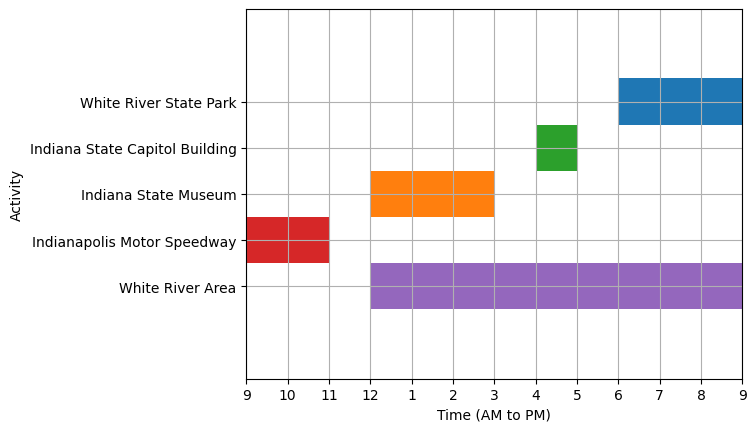

In [10]:
import matplotlib.pyplot as plt

# Figure as a Gantt chart to showcase the planned schedule of activities
fig, schedule = plt.subplots()
# Set limit of plots
schedule.set_ylim(0, 8)
schedule.set_xlim(0, 12)
# Set label of axes
schedule.set_xlabel('Time (AM to PM)')
schedule.set_ylabel('Activity')
# Set tick points and tick labels for the plots
schedule.set_yticks([2, 3, 4, 5, 6])
tmpNames = names.copy()
tmpNames.insert(0, 'White River Area')
schedule.set_yticklabels(tmpNames)
schedule.set_xticks(range(13))
schedule.set_xticklabels(['9', '10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
# Show the grid to make ticks and times seem more accurate
schedule.grid(True)
# Graphing each of the bars based on the start time, and the duration 
startIndex = 0
colors = {0 : 'red', 1: 'orange', 2: 'green', 3: 'blue', 4 : 'purple'}
for i in range(len(duration)):
    schedule.broken_barh([(startIndex, int(duration[i][0]))], (i + 2.5, 1), facecolors =('tab:' + colors[i]))
    startIndex += int(duration[i][0]) + 1
# Add a figure for the total time spent in the White River area
schedule.broken_barh([(3, 10)], (1.5, 1), facecolors = 'tab:' + colors[4])
# Save the figure to a .png file
plt.savefig("schedule.png", bbox_inches='tight')


